In [17]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import CLOO, PlackettBurman, FullFactorial
from doe_modules.plot import correlation_heatmap, design_heatmap
from doe_modules.preferences import kwarg_savefig, outputdir

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = "/home/jovyan/out"

conf = Config()

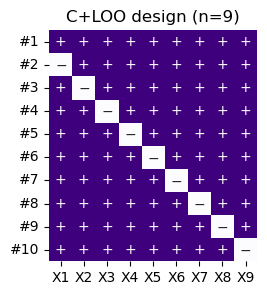

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))

n_factor = 9

design_heatmap(
    design=CLOO, n_factor=n_factor, ax=ax,
    cmap="Purples", square=True
)

ax.set(title=f"C+LOO design (n={n_factor})")

if conf.savefig:
    fig.savefig(f"{conf.out}/n={n_factor}", **kwarg_savefig)

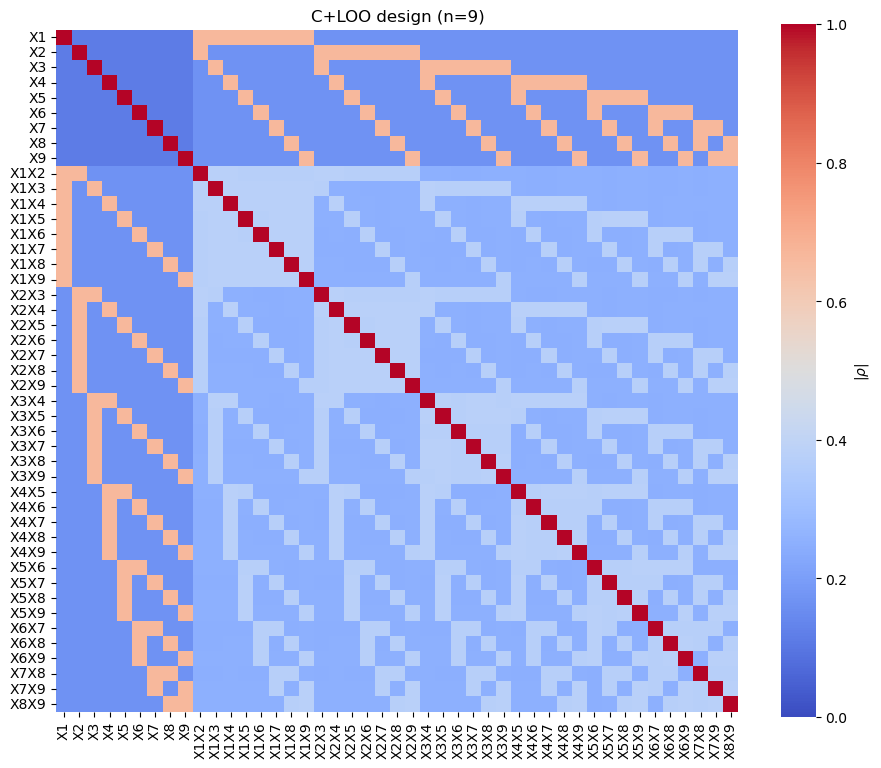

In [4]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=CLOO, n_factor=9, ax=ax,
    cmap="coolwarm", square=True
)

ax.set(title=f"C+LOO design (n={n_factor})")

if conf.savefig:
    fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

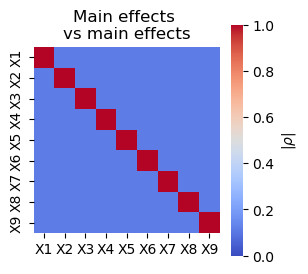

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.heatmap(
    CLOO().get_exmatrix(9)().corr().abs(),
    vmax=1, vmin=0, 
    cbar_kws={"label": r"$|\rho|$"},
    cmap="coolwarm", square=True,
    ax=ax
)

ax.set(title="Main effects \nvs main effects")

if conf.savefig:
    fig.savefig(f"{conf.out}/main_n={n_factor}", **kwarg_savefig)

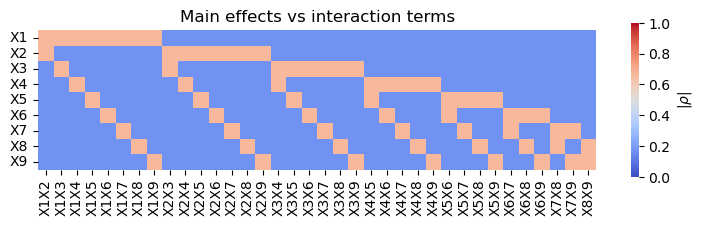

In [6]:
fig, ax = plt.subplots(figsize=(9, 2))

sns.heatmap(
    CLOO().get_exmatrix(9).interactions().corr().abs().iloc[:9, 9:],
    vmax=1, vmin=0, 
    cbar_kws={"label": r"$|\rho|$"},
    cmap="coolwarm", square=True,
    ax=ax
)

ax.set(title="Main effects vs interaction terms")

if conf.savefig:
    fig.savefig(f"{conf.out}/m&i_n={n_factor}", **kwarg_savefig)

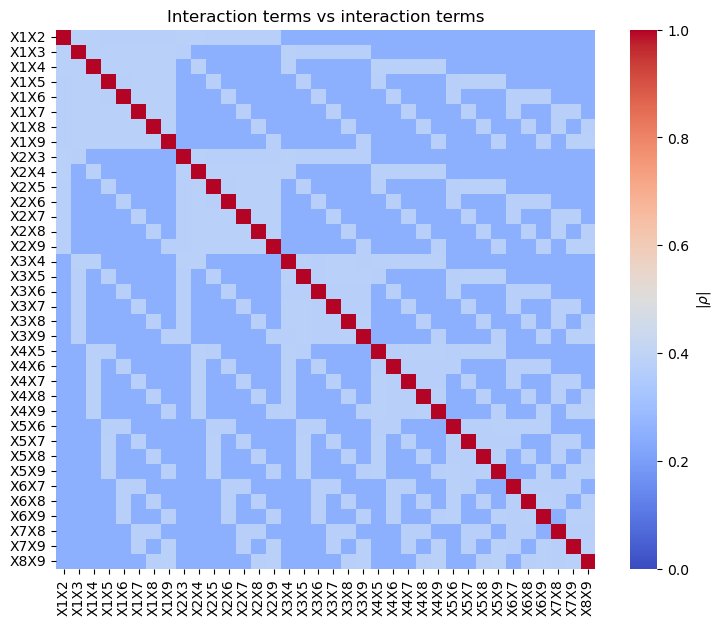

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(
    CLOO().get_exmatrix(9).interactions().corr().abs().iloc[9:, 9:],
    vmax=1, vmin=0, 
    cbar_kws={"label": r"$|\rho|$"},
    cmap="coolwarm", square=True,
    ax=ax
)

ax.set(title="Interaction terms vs interaction terms")

if conf.savefig:
    fig.savefig(f"{conf.out}/interaction_n={n_factor}", **kwarg_savefig)

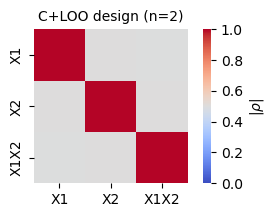

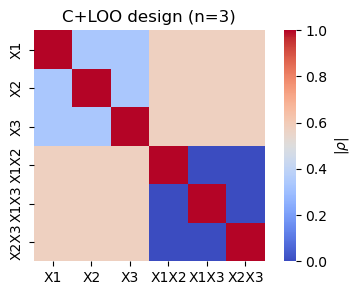

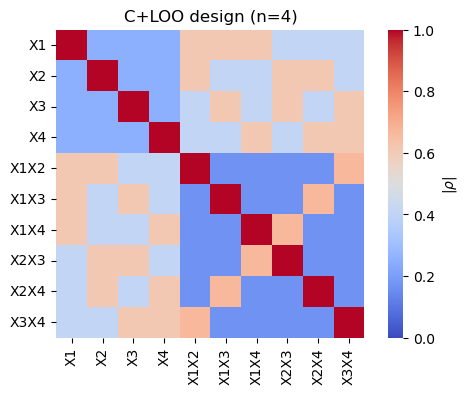

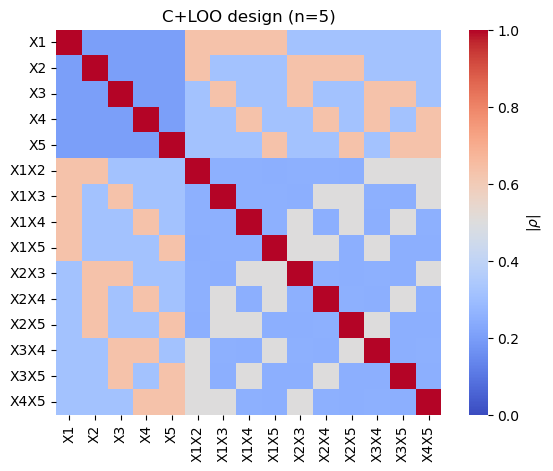

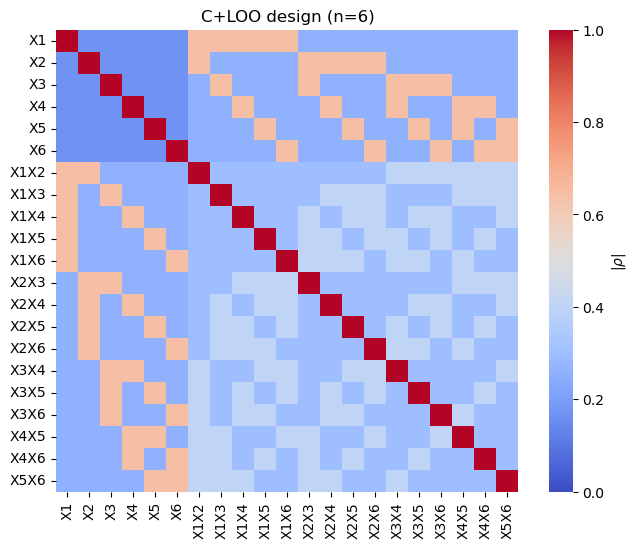

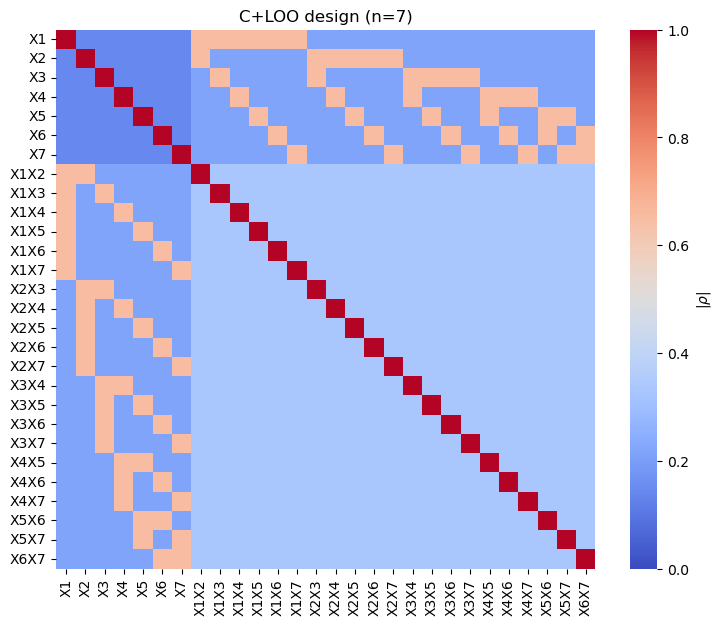

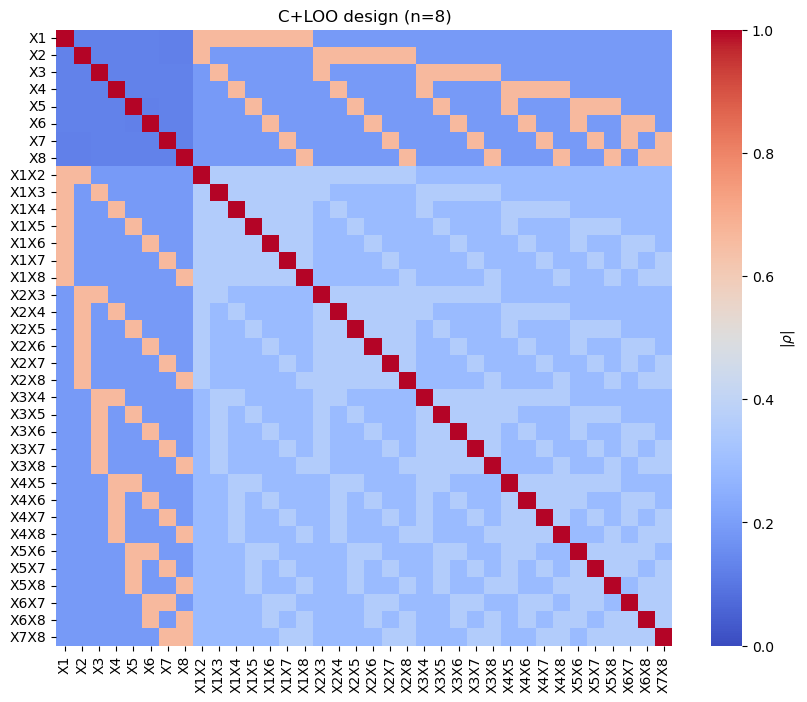

In [8]:
for n_f in [2, 3, 4, 5, 6, 7, 8]:
    fig, ax = plt.subplots(figsize=(n_f+2, n_f))

    correlation_heatmap(
        design=CLOO, n_factor=n_f, ax=ax,
        cmap="coolwarm", square=True, 
        # annot=True
    )
    ax.set_title(f"C+LOO design (n={n_f})", fontsize="medium" if n_f == 2 else "large")
    
    if conf.savefig:
        fig.savefig(f"{conf.out}/n={n_f}", **kwarg_savefig)

In [10]:
def main1_1(x: int) -> float:
    return 1 if x >= 1 else np.nan

def main1_2(x: int) -> float:
    return - 1 / x if x >= 2 else np.nan

def main1_int12(x: int) -> float:
    return np.sqrt((x - 1) / (2 * x)) if x >= 2 else np.nan

def main1_int23(x: int) -> float:
    return -np.sqrt(2 / (x * (x - 1))) if x >= 3 else np.nan

def int12_12(x: int) -> float:
    return 1 if x >= 1 else np.nan

def int12_13(x: int) -> float:
    return (x - 3) / (2 * (x - 1)) if x >= 3 else np.nan

def int12_34(x: int) -> float:
    return -2 / (x - 1) if x >= 4 else np.nan

In [11]:
m1m1 = np.vectorize(main1_1)
m1m2 = np.vectorize(main1_2)
m1i12 = np.vectorize(main1_int12)
m1i23 = np.vectorize(main1_int23)
i12i12 = np.vectorize(int12_12)
i12i13 = np.vectorize(int12_13)
i12i34 = np.vectorize(int12_34)

In [133]:
n = np.arange(25) + 1

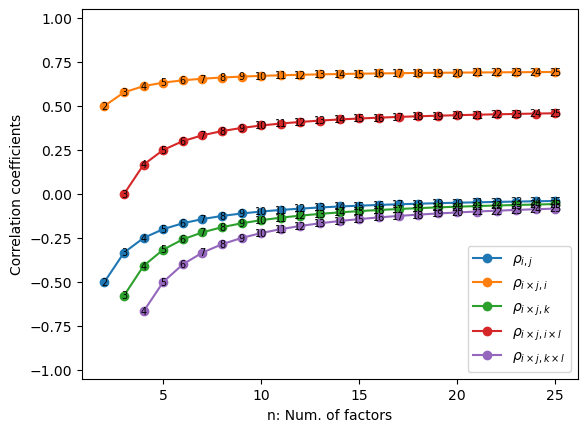

In [13]:
fig, ax = plt.subplots()

# ax.plot(n, m1m1(n), label=r"$\rho_{i,i}$", marker="o")
ax.plot(n, m1m2(n), label=r"$\rho_{i,j}$", marker="o")
ax.plot(n, m1i12(n), label=r"$\rho_{i\times j,i}$", marker="o")
ax.plot(n, m1i23(n), label=r"$\rho_{i\times j,k}$", marker="o")
# ax.plot(n, i12i12(n), label=r"$\rho_{i\times j,i\times j}$", marker="o")
ax.plot(n, i12i13(n), label=r"$\rho_{i\times j,i\times l}$", marker="o")
ax.plot(n, i12i34(n), label=r"$\rho_{i\times j,k\times l}$", marker="o")

for f in [m1m2, m1i12, m1i23, i12i13, i12i34]:
    for x, y in zip(n, f(n)):
        if not np.isnan(y):
            ax.text(x, y, x, size=7, ha="center", va="center")

ax.set_ylim(-1.05, 1.05)
ax.legend()
ax.set(ylabel="Correlation coefficients", xlabel="n: Num. of factors")

if conf.savefig:
        fig.savefig(f"{conf.out}/corr", **kwarg_savefig)

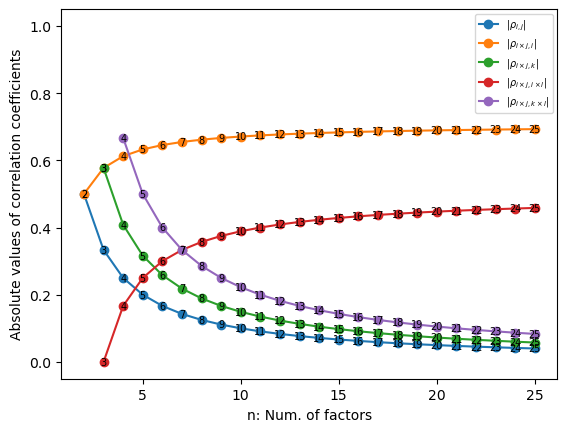

In [14]:
fig, ax = plt.subplots()

# ax.plot(n, np.abs(m1m1(n)), label=r"$|\rho_{i,i}|$", marker="o")
ax.plot(n, np.abs(m1m2(n)), label=r"$|\rho_{i,j}|$", marker="o")
ax.plot(n, np.abs(m1i12(n)), label=r"$|\rho_{i\times j,i}|$", marker="o")
ax.plot(n, np.abs(m1i23(n)), label=r"$|\rho_{i\times j,k}|$", marker="o")
# ax.plot(n, np.abs(i12i12(n)), label=r"$|\rho_{i\times j,i\times j}|$", marker="o")
ax.plot(n, np.abs(i12i13(n)), label=r"$|\rho_{i\times j,i\times l}|$", marker="o")
ax.plot(n, np.abs(i12i34(n)), label=r"$|\rho_{i\times j,k\times l}|$", marker="o")

for f in [m1m2, m1i12, m1i23, i12i13, i12i34]:
    for x, y in zip(n, np.abs(f(n))):
        if not np.isnan(y):
            ax.text(x, y, x, size=7, ha="center", va="center")

ax.set_ylim(-.05, 1.05)
ax.legend(fontsize="x-small")
ax.set(ylabel="Absolute values of correlation coefficients", xlabel="n: Num. of factors")

if conf.savefig:
        fig.savefig(f"{conf.out}/corr_abs", **kwarg_savefig)

In [14]:
class Sim1:
    def __init__(
        self, 
        random_state: int = 0,
        kwarg_v: dict = dict(mean=1, sigma=.8),
        kwarg_a: dict = dict(mean=2, sigma=.3),
        kwarg_b: dict = dict(mean=1, sigma=.5)
    ):
        np.random.seed(random_state)
        seeds = np.random.randint(0, 2**32, 3)
        np.random.seed(seeds[0])
        self.v = {
            i+1: vi for i, vi in enumerate(
                np.random.lognormal(**kwarg_v, size=9)
            )
        }
        np.random.seed(seeds[1])
        self.a = {
            i: a for i, a in zip(
                [1, 2, 6, 7, 9],
                np.random.lognormal(**kwarg_a, size=5)
            )
        }
        np.random.seed(seeds[2])
        self.b = {
            i: b for i, b in zip(
                [2, 3, 4, 5, 6, 8],
                np.random.lognormal(**kwarg_b, size=6)
            )
        }
        self.c, self.x, self.y = None, None, None

    def run(
        self, 
        design_array, 
        random_state: int = 0,
        kwarg_err: dict = dict(loc=0, scale=1)
    ):
        c = {
            i+1: (ci + 1) / 2 for i, ci in enumerate(design_array)
        }
        np.random.seed(random_state)
        e = np.random.normal(**kwarg_err, size=10)
        f = lambda x: max(0, x)

        x1 = f(c[1] * (self.v[1] + e[1]))
        x2 = f(c[2] * (self.v[2] + e[2]))
        x3 = f(c[3] * (self.v[3] + e[3]))
        x4 = f(c[4] * (self.v[4] + e[4]))
        x5 = f(
            c[5] * (self.v[5] - self.b[4] * x4 + e[5])
        )
        x6 = f(c[6] * (self.v[6] + e[6]))
        x7 = f(
            c[7] * (
                self.v[7] + self.b[2] * x2 + self.b[3] * x3 - (self.b[5] * x5) - (self.b[6] * x6) + e[7]
            )
        )
        x8 = f(c[8] * (self.v[8] + e[8]))
        x9 = f(
            c[9] * (self.v[9] + self.b[8] * x8 + e[9])
        )
        self.c = c
        self.x = {i+1: xi for i, xi in enumerate([x1, x2, x3, x4, x5, x6, x7, x8, x9])}
        self.y = self.a[1] * x1 + self.a[2] * x2 + self.a[6] * x6 + self.a[7] * x7 - (self.a[9] * x9) + e[0]
        return self.y
    

    def plot(
        self,
        ax: plt.Axes
    ):
        ax.fill_between([0, 10], [0, 0], [1, 1], color=".7", alpha=.2)

        datdot = pd.DataFrame({
            "name": [
                f"X{i + 1}" if self.x is None else round(self.x[i + 1], 2) for i in range(9)
            ],
            "h": [1, 3, 5, 7, 7, 7, 5, 9, 9],
            "v": [3, 6, 6, 9, 6, 3, 3, 6, 3],
            "c": [
               ".7" if self.x is not None and self.x[i + 1] == 0 else plt.cm.rainbow(i/9) for i in range(9)
            ],
            "alpha": [
               .2 if self.x is not None and self.x[i + 1] == 0 else 1 for i in range(9)
            ],
        })

        ax.scatter(data=datdot, x="h", y="v", s=500, color="c", alpha=datdot.alpha)
        ap = lambda n: dict(
            shrink=0, width=1, headwidth=5, 
            headlength=5, connectionstyle="arc3",
            facecolor=datdot.c[n - 1], edgecolor=datdot.c[n - 1],
            alpha=datdot.alpha[n - 1]
        )
        ap2 = lambda n: dict(
            arrowstyle="|-|", 
            facecolor=datdot.c[n - 1], edgecolor=datdot.c[n - 1],
            linewidth=2, mutation_scale=4,
            alpha=datdot.alpha[n - 1]
        )
        arrconf=dict(ha="center", va="center", zorder=-10)

        ax.annotate("", [1, 1], [1, 3], arrowprops=ap(1), **arrconf)
        ax.annotate("", [3, 1], [3, 6], arrowprops=ap(2), **arrconf)
        ax.annotate("", [4.5, 3.5], [3, 6], arrowprops=ap(2), **arrconf)
        ax.annotate("", [5, 3.7], [5, 6], arrowprops=ap(3), **arrconf)
        ax.annotate("", [7, 6.8], [7, 9], arrowprops=ap2(4), **arrconf)
        ax.annotate("", [5.5, 3.7], [7, 6], arrowprops=ap2(5), **arrconf)
        ax.annotate("", [5.6, 3], [7, 3], arrowprops=ap2(6), **arrconf)
        ax.annotate("", [7, 1], [7, 3], arrowprops=ap(6), **arrconf)
        ax.annotate("", [5, 1], [5, 3], arrowprops=ap(7), **arrconf)
        ax.annotate("", [9, 3.7], [9, 6], arrowprops=ap(8), **arrconf)
        ax.annotate("", [9, 1.1], [9, 3], arrowprops=ap2(9), **arrconf)

        for i in range(len(datdot)):
            ax.text(
                *datdot.iloc[i, 1:3], datdot.iloc[i, 0], ha="center", va="center",
                size="medium" if self.x is None else 7
            )

        for n, a in self.a.items():
            ax.text(
                datdot.iloc[n - 1, 1], 1.75, "" if datdot.name[n - 1] in [f"X{n}", 0.0] else r"$\times$" + f"{a.round(2)}",
                ha="center", va="center", size=6
            )
        
        for n, b in self.b.items():
            ax.text(
                {2: 4, 3: 5, 4: 7, 5: 6, 6: 6, 8: 9}[n],
                {2: 4.5, 3: 4.5, 4: 7.5, 5: 4.5, 6: 3, 8: 4.5}[n],
                "" if datdot.name[n - 1] in [f"X{n}", 0.0] else r"$\times$" + f"{b.round(2)}",
                ha="center", va="center", size=6
            )
        
        if self.c is not None:
            for n, c in self.c.items():
                ax.scatter(
                    *{i + 1: (h, v) for i, h, v in zip(range(9), datdot.h, datdot.v)}[n],
                    marker="x", s=300, color="r"
                ) if c == 0 else None

        ax.text(5, .5, "output value" if self.y is None else round(self.y, 2), ha="center", va="center")

        ax.set_ylim([0, 10])
        ax.set_xlim([0, 10])

        ax.axis("off")
        return None

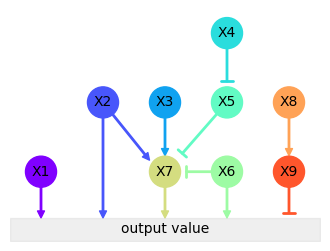

In [16]:
fig, ax = plt.subplots(figsize=(4, 3))

Sim1().plot(ax=ax)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_model", **kwarg_savefig)

In [28]:
exdes = CLOO().get_exmatrix(9)()

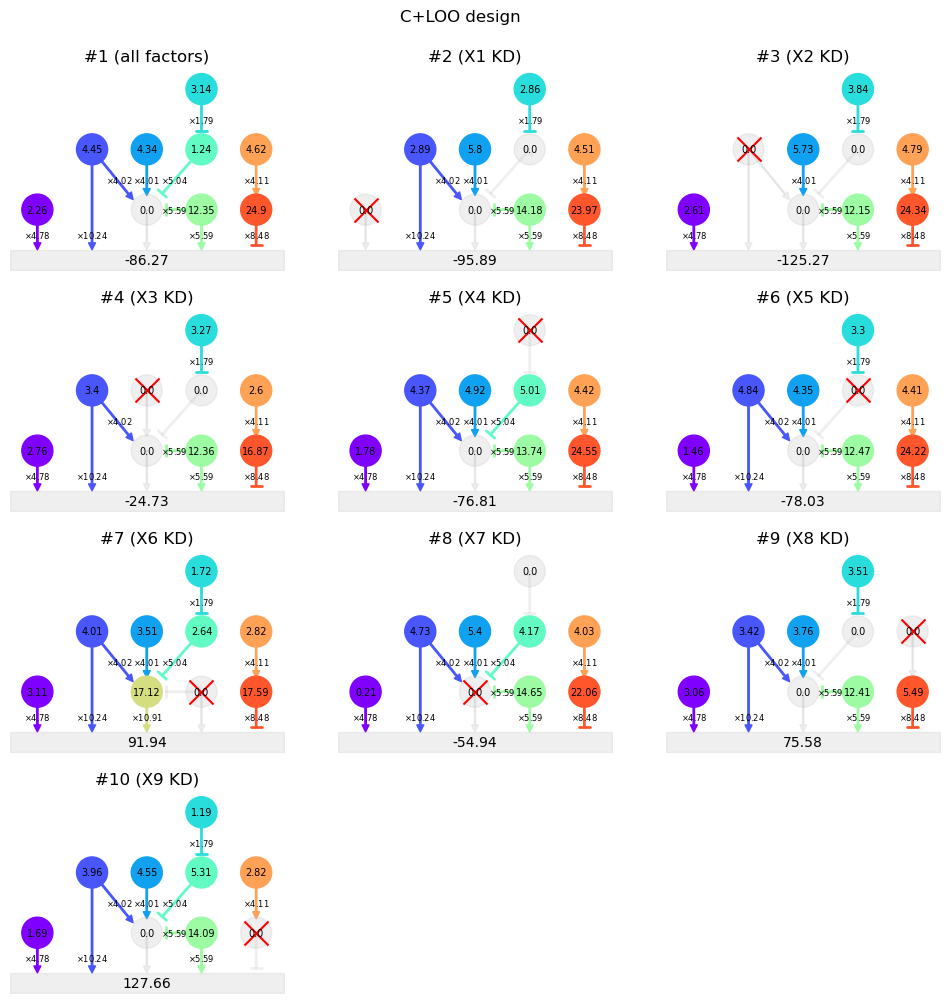

In [42]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = Sim1()
# model.plot(ax=ax.ravel()[0])

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes))
y = []

for i, s in enumerate(seeds):
    y += [
        model.run(
            design_array=exdes.iloc[i, :], 
            random_state=s
        )
    ]
    model.plot(ax=ax.ravel()[i])
    suffix = "all factors" if i == 0 else f"X{i} KD"
    ax.ravel()[i].set(title=f"#{i + 1} ({suffix})")

y = np.array(y)

[a.axis("off") for a in ax.ravel()[-2:]];

fig.suptitle(f"C+LOO design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim", **kwarg_savefig)

res = sm.OLS(y, exdes).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(6, 6))

sign = lambda x: 2 * int(x >= 0) - 1

def asterisk(p) -> str:
    if p >= .05:
        return "N.S."
    elif .01 <= p < .05:
        return "*"
    elif .001 <= p < .01:
        return "**"
    else:
        return "***"

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[0]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[0].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 3)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[0].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[0].get_xlim()]))
ax[0].set(
    xlabel="Coefficient", 
    ylabel="", 
    title="N=1"
)

nrep = 3
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[1].set(xlabel="Coefficient", ylabel="", title=f"N={nrep}")

fig.suptitle("C+LOO design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_mlr", **kwarg_savefig)

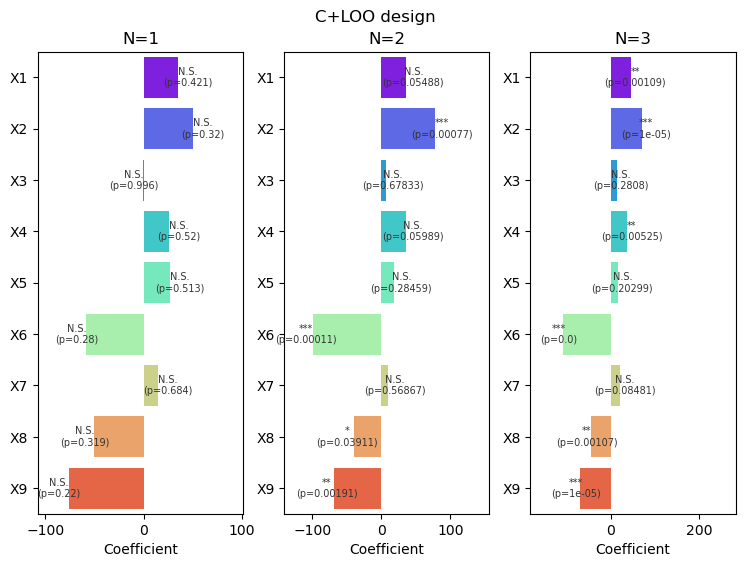

In [37]:
res = sm.OLS(y, exdes).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(9, 6))

sign = lambda x: 2 * int(x >= 0) - 1

def asterisk(p) -> str:
    if p >= .05:
        return "N.S."
    elif .01 <= p < .05:
        return "*"
    elif .001 <= p < .01:
        return "**"
    else:
        return "***"

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[0]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[0].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 3)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[0].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[0].get_xlim()]))
ax[0].set(
    xlabel="Coefficient", 
    ylabel="", 
    title="N=1"
)

nrep = 2
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)


nrep = 3
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[-1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[-1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[-1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[-1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)

fig.suptitle("C+LOO design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_mlr", **kwarg_savefig)

/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


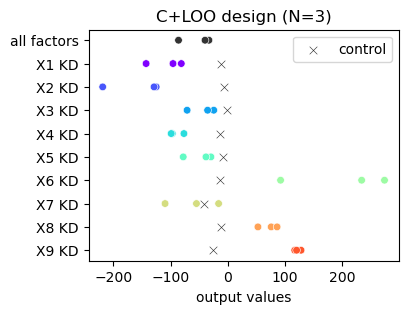

In [41]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.scatterplot(
    y=["all factors" if i == 0 else f"X{i} KD" for i in range(10)] * nrep, 
    x=y3, s=30, color = (
        [".2"] + [plt.cm.rainbow(i/9) for i in range(9)]
    ) * 3
)

counterpart = [None] + [
    np.mean([v for loc, v in enumerate(y3) if loc % 10 != i]) for i in range(9)
]

sns.scatterplot(
    y=["control" if i == 0 else f"X{i} KD" for i in range(10)], 
    x=counterpart, s=30, marker="x", color=".2", label="control"
)

ax.set(xlabel="output values", ylabel="", title=f"C+LOO design (N={nrep})")

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_res_n={nrep}", **kwarg_savefig)

/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)
/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1096: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


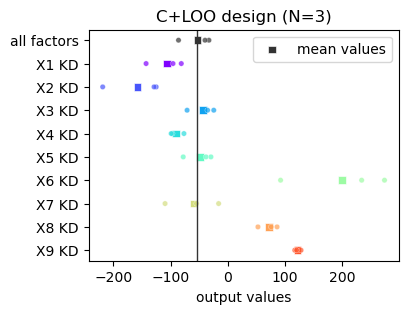

In [72]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.scatterplot(
    y=["all factors" if i == 0 else f"X{i} KD" for i in range(10)] * nrep, 
    x=y3, s=15, color = (
        [".2"] + [plt.cm.rainbow(i/9) for i in range(9)]
    ) * 3, alpha=.7
)

sns.scatterplot(
    y=["all factors" if i == 0 else f"X{i} KD" for i in range(10)],
    x=y3.reshape(3, -1).mean(axis=0),
    s=30, marker=",",
    color = [".2"] + [plt.cm.rainbow(i/9) for i in range(9)],
    label="mean values", zorder=-100
)

ylim = ax.get_ylim()
ax.vlines(
    y3.reshape(3, -1).mean(axis=0)[0], *ylim, 
    color=".2", linewidth=1
)
ax.set_ylim(ylim)
ax.set(xlabel="output values", ylabel="", title=f"C+LOO design (N={nrep})")

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_res_n={nrep}_intuitive", **kwarg_savefig)

---
# PB

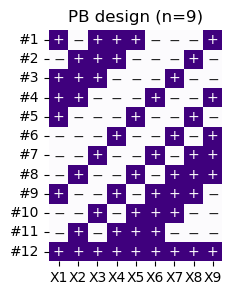

In [22]:
fig, ax = plt.subplots(figsize=(3, 3))

n_factor = 9

design_heatmap(
    design=PlackettBurman, n_factor=n_factor, ax=ax,
    cmap="Purples", square=True
)

ax.set(title=f"PB design (n={n_factor})")

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_n={n_factor}", **kwarg_savefig)

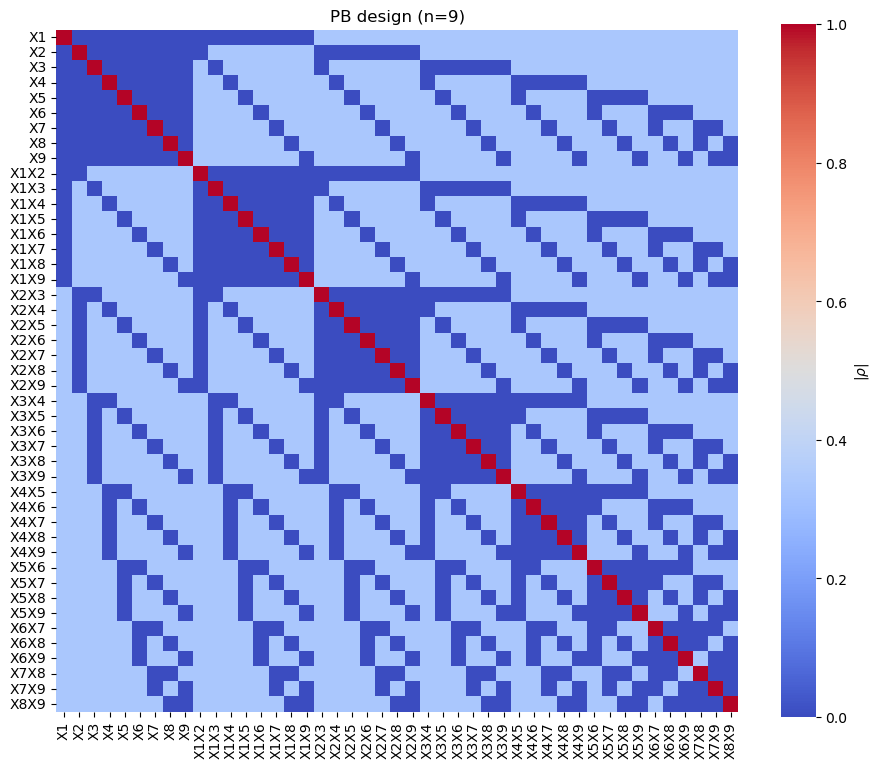

In [23]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=PlackettBurman, n_factor=9, ax=ax,
    cmap="coolwarm", square=True
)

ax.set(title=f"PB design (n={n_factor})")

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_corr_n={n_factor}", **kwarg_savefig)

In [25]:
exdes = PlackettBurman().get_exmatrix(9)()

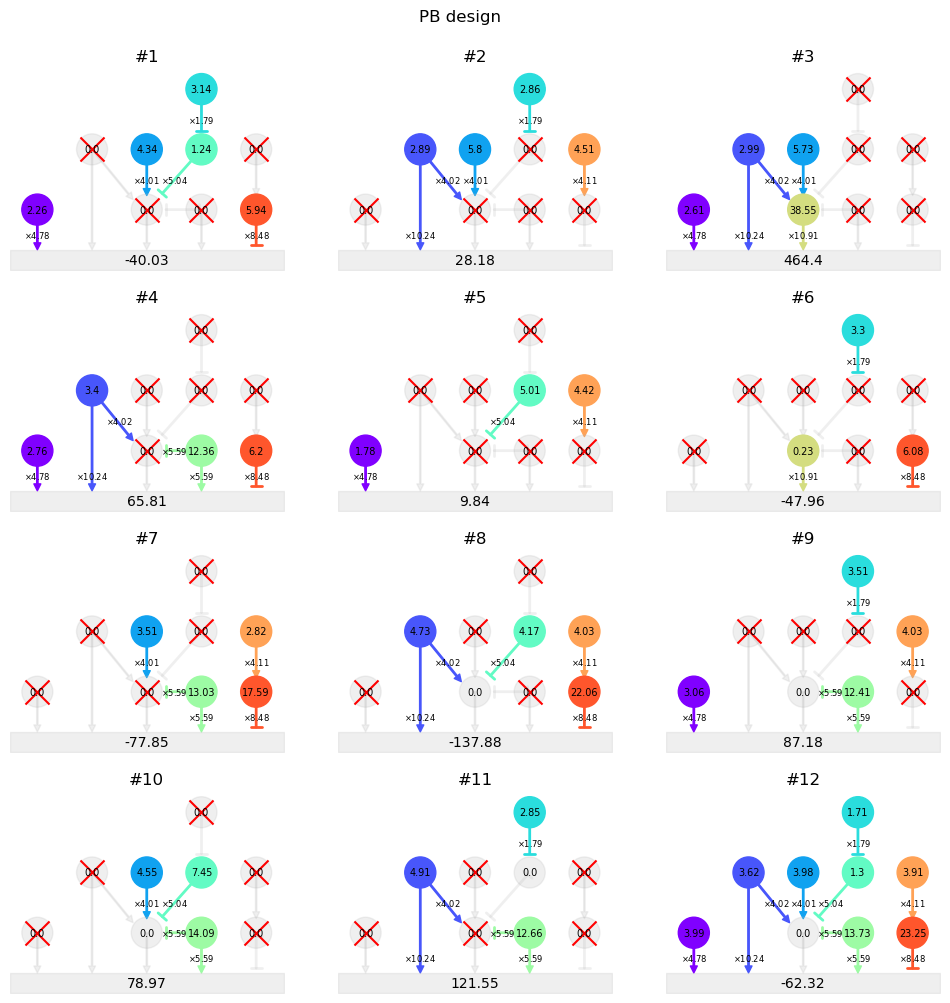

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = Sim1()

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes))
y = []

for i, s in enumerate(seeds):
    y += [
        model.run(
            design_array=exdes.iloc[i, :], 
            random_state=s
        )
    ]
    model.plot(ax=ax.ravel()[i])
    ax.ravel()[i].set(title=f"#{i + 1}")

y = np.array(y)
fig.suptitle("PB design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_sim", **kwarg_savefig)

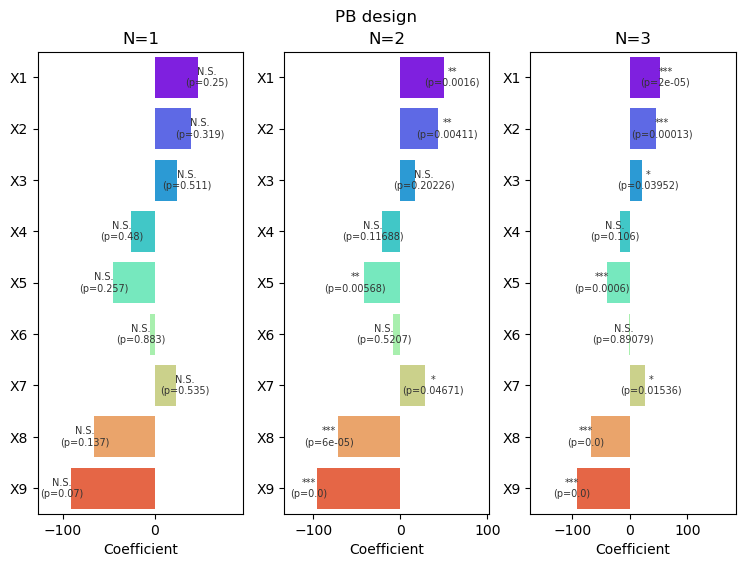

In [27]:
res = sm.OLS(y, exdes).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(9, 6))

sign = lambda x: 2 * int(x >= 0) - 1

def asterisk(p) -> str:
    if p >= .05:
        return "N.S."
    elif .01 <= p < .05:
        return "*"
    elif .001 <= p < .01:
        return "**"
    else:
        return "***"

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[0]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[0].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 3)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[0].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[0].get_xlim()]))
ax[0].set(
    xlabel="Coefficient", 
    ylabel="", 
    title="N=1"
)

nrep = 2
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)


nrep = 3
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[-1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[-1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[-1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[-1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)

fig.suptitle("PB design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_sim_mlr", **kwarg_savefig)

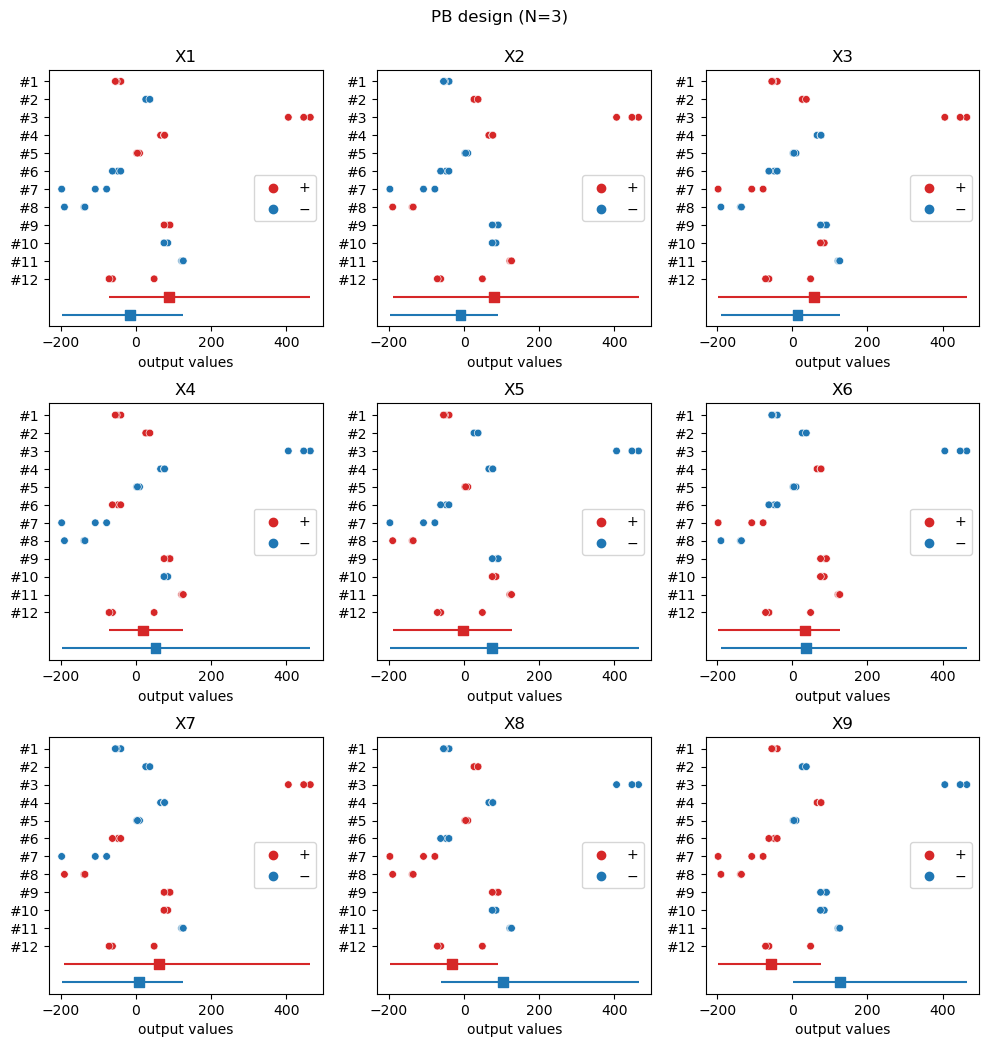

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

for i, a in enumerate(ax.ravel()):
    factor = [f"X{i + 1}" for i in range(9)][i]
    df_temp = pd.DataFrame({
        factor: [["$-$", "$+$"][
                v
            ] for v in (
                    (1 + pd.concat([exdes] * nrep).loc[:, factor]) / 2
                ).astype(int)
            ],
        "idx": pd.concat([exdes] * nrep).reset_index().loc[:, "index"]
    })
    sns.scatterplot(
        data=df_temp,
        y="idx", x=y3, s=30, hue=factor, 
        palette={"$+$": "C3", "$-$":"C0"}, ax=a
    )

    mean_pos = np.mean(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    mean_neg = np.mean(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])
    max_pos = np.max(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    max_neg = np.max(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])
    min_pos = np.min(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    min_neg = np.min(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])

    a.scatter(
        x=[mean_pos, mean_neg],
        y=[12, 13], marker=",", color=["C3", "C0"], s=50
    )

    a.hlines(12, min_pos, max_pos, color="C3")
    a.hlines(13, min_neg, max_neg, color="C0")
    a.set(
        xlabel="output values", ylabel="", 
        title=factor
    )
    handles, labels = a.get_legend_handles_labels()
    a.legend(
        handles = handles if df_temp.loc[:, factor][0] == "$+$" else handles[::-1],
        labels = labels if df_temp.loc[:, factor][0] == "$+$" else labels[::-1],
        loc="center right", bbox_to_anchor=(1, .5))

fig.suptitle(f"PB design (N={nrep})", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_sim_res_n={nrep}", **kwarg_savefig)

---
# Full Factorial

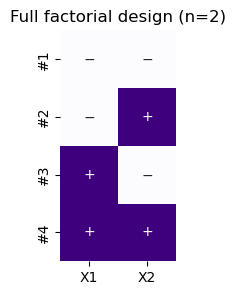

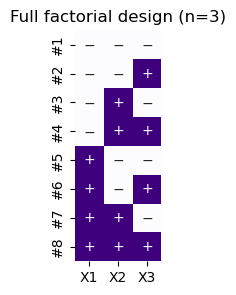

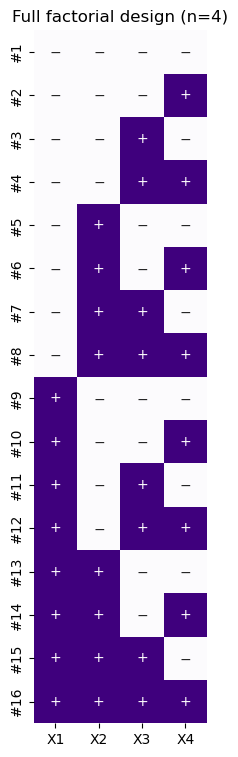

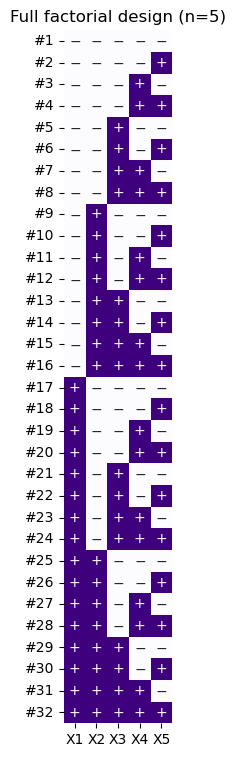

In [12]:
for n_factor in np.arange(2, 6):
    
    figsize = [(3, 3)] * 2 + [(3, 9)] * 2

    fig, ax = plt.subplots(figsize=figsize[n_factor - 2])

    design_heatmap(
        design=FullFactorial, n_factor=n_factor, ax=ax,
        cmap="Purples", square=True
    )

    ax.set(title=f"Full factorial design (n={n_factor})")

    if conf.savefig:
        fig.savefig(f"{conf.out}/ff_n={n_factor}", **kwarg_savefig)

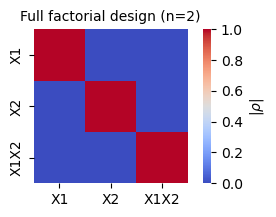

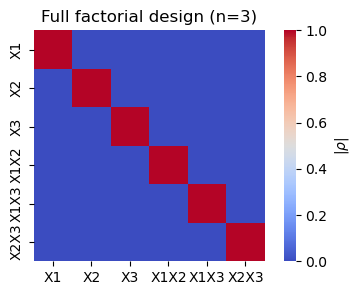

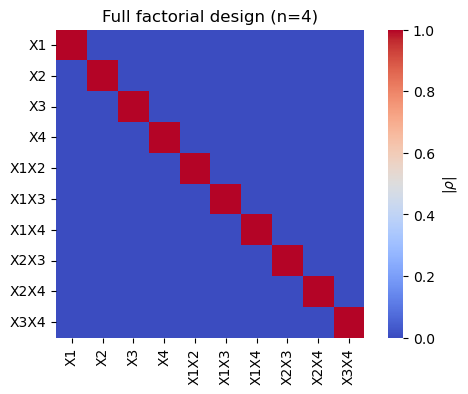

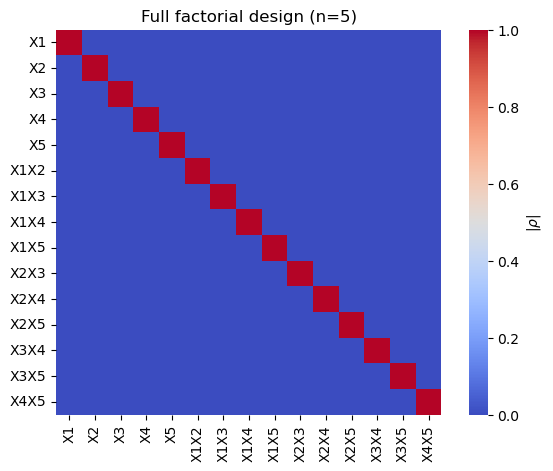

In [21]:
for n_f in np.arange(2, 6):
    fig, ax = plt.subplots(figsize=(n_f+2, n_f))

    correlation_heatmap(
        design=FullFactorial, n_factor=n_f, ax=ax,
        cmap="coolwarm", square=True, 
        # annot=True
    )
    ax.set_title(f"Full factorial design (n={n_f})", fontsize="medium" if n_f == 2 else "large")
    
    if conf.savefig:
        fig.savefig(f"{conf.out}/ff_corr_n={n_f}", **kwarg_savefig)

In [15]:
exdes = FullFactorial().get_exmatrix(9)()

In [19]:
model = Sim1()

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes))
y = []

for i, s in enumerate(seeds):
    y += [
        model.run(
            design_array=exdes.iloc[i, :], 
            random_state=s
        )
    ]

y = np.array(y)

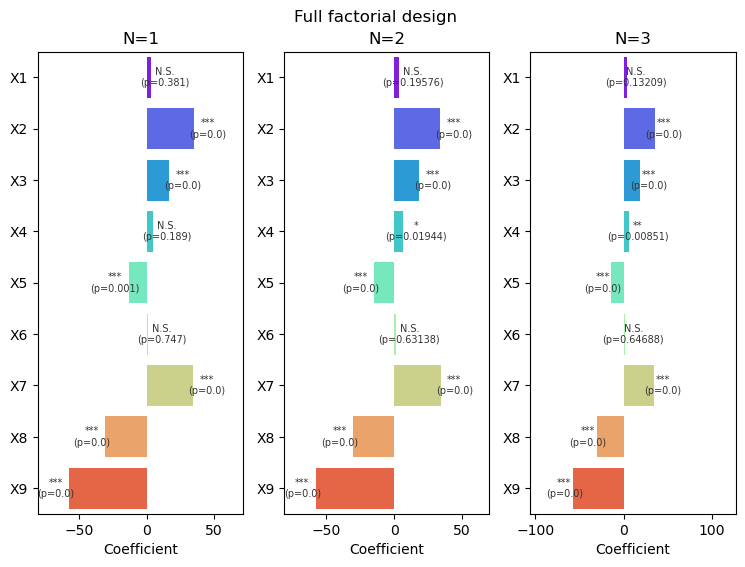

In [20]:
res = sm.OLS(y, exdes).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(9, 6))

sign = lambda x: 2 * int(x >= 0) - 1

def asterisk(p) -> str:
    if p >= .05:
        return "N.S."
    elif .01 <= p < .05:
        return "*"
    elif .001 <= p < .01:
        return "**"
    else:
        return "***"

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[0]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[0].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 3)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[0].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[0].get_xlim()]))
ax[0].set(
    xlabel="Coefficient", 
    ylabel="", 
    title="N=1"
)

nrep = 2
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)


nrep = 3
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[-1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[-1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[-1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[-1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)

fig.suptitle("Full factorial design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/ff_sim_mlr", **kwarg_savefig)

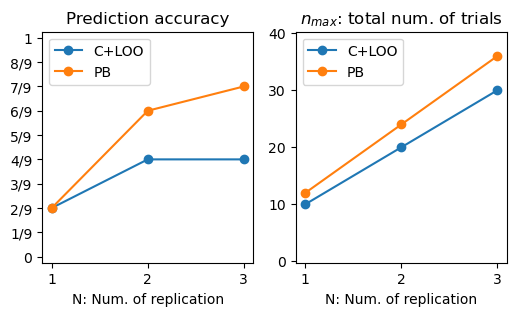

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].plot(
    [1, 2, 3], [2, 4, 4], label="C+LOO", marker="o",
)
ax[0].plot(
    [1, 2, 3], [2, 6, 7], label="PB", marker="o",
)

ax[0].set_ylim([-.25, 9.25])
ax[0].set_yticks(np.arange(0, 10), ["0"] + [f"{i}/9" for i in np.arange(1, 9)] + ["1"])
ax[0].set(title="Prediction accuracy", xlabel="N: Num. of replication")

ax[1].plot(
    [1, 2, 3], [10, 20, 30], label="C+LOO", marker="o",
)
ax[1].plot(
    [1, 2, 3], [12, 24, 36], label="PB", marker="o",
)
ax[1].set_ylim([-.25, 40.25])
ax[1].set(title="$n_{max}$: total num. of trials", xlabel="N: Num. of replication")

[a.set_xticks(np.arange(1, 4), np.arange(1, 4)) for a in ax]
[a.legend(loc="upper left") for a in ax];

if conf.savefig:
    fig.savefig(f"{conf.out}/benchmark", **kwarg_savefig)

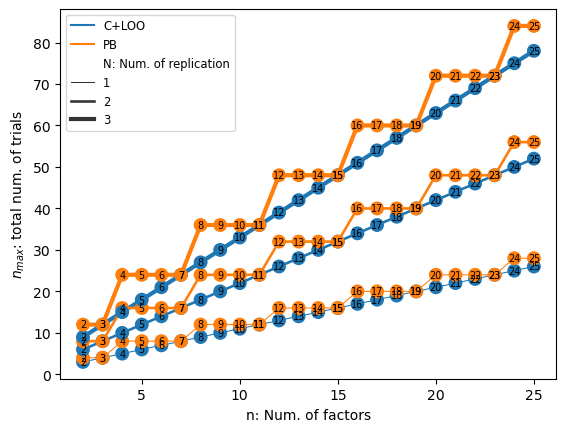

In [171]:
fig, ax = plt.subplots()

n_cloo = np.vectorize(lambda x: x + 1)
n_pb = np.vectorize(lambda x: 4 * (x // 4 + 1))
n_cloo2 = np.vectorize(lambda x: 2 * (x + 1))
n_pb2 = np.vectorize(lambda x: 8 * (x // 4 + 1))
n_cloo3 = np.vectorize(lambda x: 3 * (x + 1))
n_pb3 = np.vectorize(lambda x: 12 * (x // 4 + 1))

lim = 25

m = n[1:lim]
dat = pd.DataFrame({
    "n": np.concatenate([m] * 6),
    "nmax": np.concatenate(
        [n_cloo(m), n_pb(m)] + [2 * n_cloo(m), 2 * n_pb(m)] + [3 * n_cloo(m), 3 * n_pb(m)]
    ),
    "": (["C+LOO"] * (lim-1) + ["PB"] * (lim-1)) * 3,
    "N: Num. of replication": [1] * 2 * (lim-1) + [2] * 2 * (lim-1) + [3] * 2 * (lim-1)
})

sns.lineplot(
    data=dat, x="n", y="nmax", hue="", size="N: Num. of replication",
    marker="o"
)
sns.scatterplot(
    data=dat, x="n", y="nmax", hue="", legend=False, 
    **dict(s=100), zorder=10, linewidth=0
)

for f in [n_cloo, n_pb, n_cloo2, n_pb2, n_cloo3, n_pb3]:
    for x, y in zip(m, f(m)):
        ax.text(x, y, x, size=7, ha="center", va="center", zorder=11)

# ax.set_ylim(-.05, 1.05)
ax.legend(fontsize="small")
ax.set(ylabel="$n_{max}$: total num. of trials", xlabel="n: Num. of factors")

if conf.savefig:
        fig.savefig(f"{conf.out}/n_max", **kwarg_savefig)